In [1]:
# Predicting the quality of wine using Machine Learning.
# Importing the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# DATA COLLECTION---------

In [3]:
# Loading the 'Red Wine Quality Dataset' using pandas DataFrame.
wine_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
# Checking the shape of the data means dataset consists of no. of rows and columns. 
wine_data.shape

(1599, 12)

In [5]:
# Checking the total columns names of the dataset.
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# Cheking the whole information abot the dataset.
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Checking the null/missing values.
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#EPLORATORY DATA ANALYSIS/VISUALIZATION.
# Checking statistical measures of the dataset.
# Statistic Summary.

wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


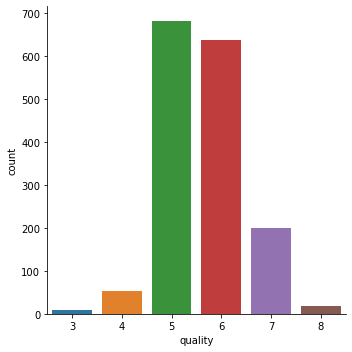

In [9]:
# Checking each column against quality column.
sns.catplot(x='quality',data=wine_data,kind='count')

In [10]:
# Here in the above graph we observe that the if the quality<6 then it is bad and if quality>6 then it is good one.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

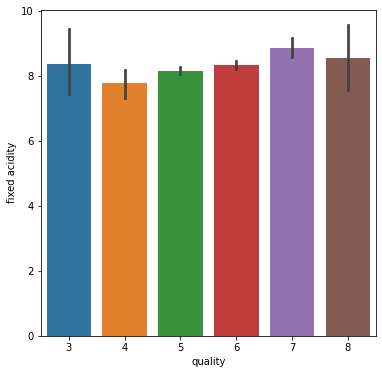

In [11]:
# Here we will plot the bar plot for each input variable vs output variable(quality).
# Fixed acidity vs quality.
plot=plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='fixed acidity',data=wine_data)

In [12]:
# Here in the above bar plot the quality of the wine inccreases with the increase fixed acidity.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

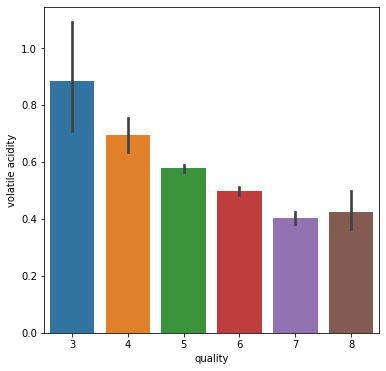

In [13]:
# quality vs volatile acidity.
plot=plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

In [14]:
# Here we can see that if the volatile acidity increases the quality of the wine decreases.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

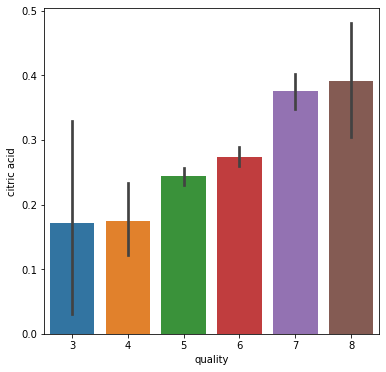

In [15]:
# citric acid vs quality.
plot=plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='citric acid',data=wine_data)

In [16]:
# Here we observe that the increase in citric acid leads to increase in quality of wine i.e.higher the level of citric acid higher the qualty of wine.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

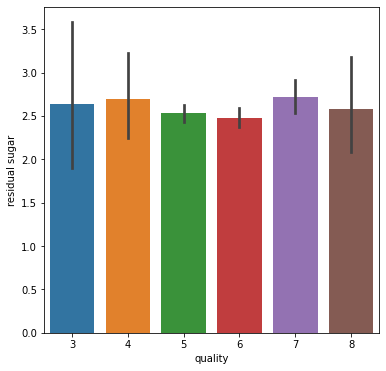

In [17]:
# residual sugar vs quality.
plot=plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='residual sugar',data=wine_data)

In [18]:
# Here we observe that lesser the residual sugar higher the wine quality.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

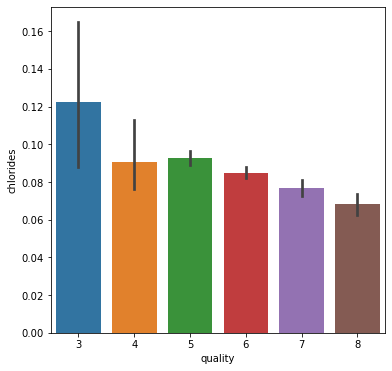

In [19]:
plot=plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='chlorides',data=wine_data)

In [20]:
# Here we observe that lesser the chemical chlorides higher the wine quality.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

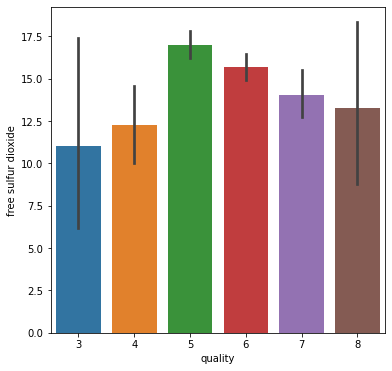

In [21]:
# free sulfur dioxide vs quality.
plot=plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine_data)

In [22]:
# Here we observe that lesser the free sulfur dioxide higher the wine quality.

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

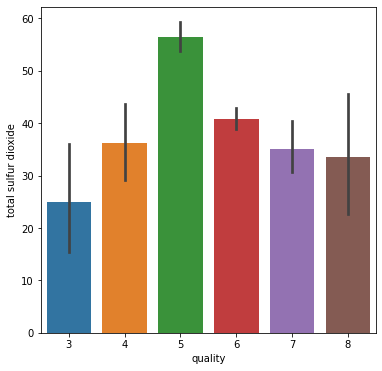

In [23]:
# total sulfur dioxide vs quality.
plot=plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine_data)

In [24]:
# Here we observe that lesser the total sulfur dioxide higher the wine quality.

<AxesSubplot:xlabel='quality', ylabel='density'>

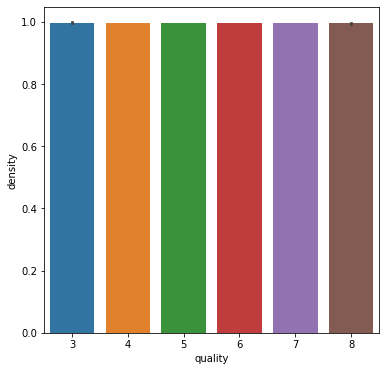

In [25]:
# Density vs quality.
plot=plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='density',data=wine_data)

In [26]:
# Here we don't see that much fluctuations in both density and quality

<AxesSubplot:xlabel='quality', ylabel='pH'>

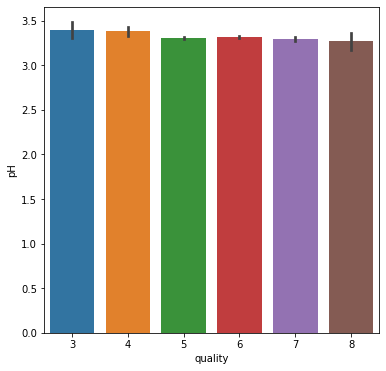

In [27]:
# ph vs quality. 
plot=plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='pH',data=wine_data)

In [28]:
# Here the ph level doesn't make that much impact on quality. 

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

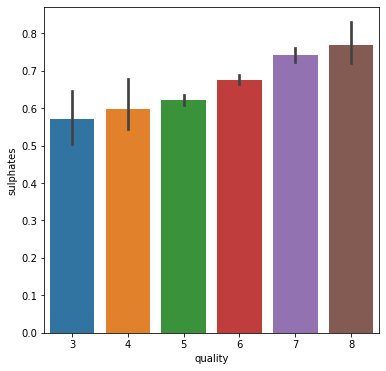

In [29]:
# sulphates vs quality.
plot=plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='sulphates',data=wine_data)

In [30]:
# Here the quality decreases as sulphates increases and vice-versa.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

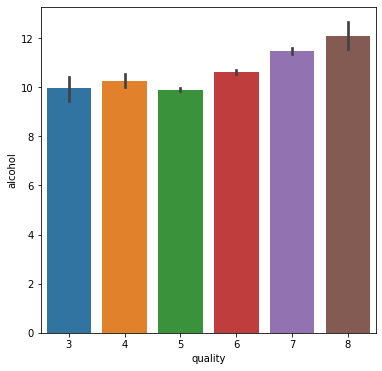

In [31]:
# alcohol vs quality.
plot=plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='alcohol',data=wine_data)

In [32]:
# Here the quality increases as alcohol level increases and vice-versa.

In [33]:
# Now we will check the correlation of all the columns with quality column.
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

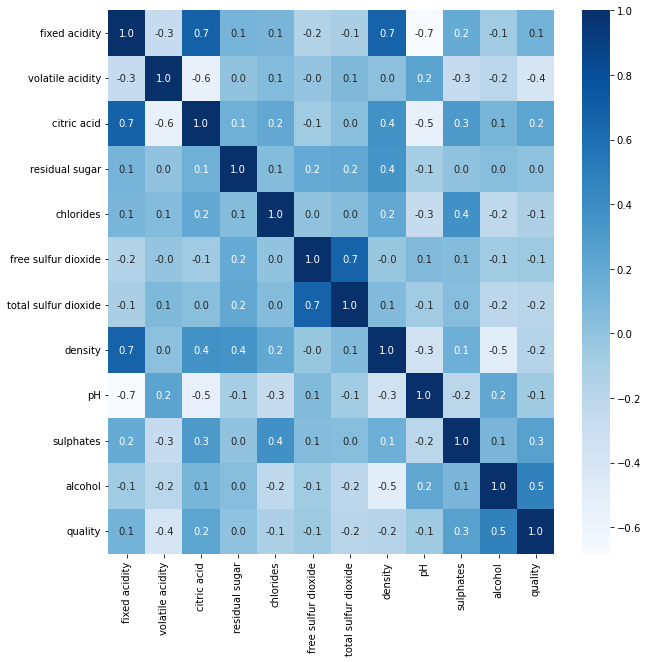

In [34]:
# We will visualize the above description with the help of heatmap.

plt.figure(figsize=(10,10))
sns.heatmap(wine_data.corr(), annot=True, cbar=True, cmap='Blues', fmt='0.1f')

In [35]:
# Here in the above heatmap, we can see that the darker shade of color shows highly corelated value i.e. positive correlation.
# The diagonal pattern of the heatmap shows all highely correlated values.
# And the least darker shade shows that there is no correlation, i.e. negative correlation.

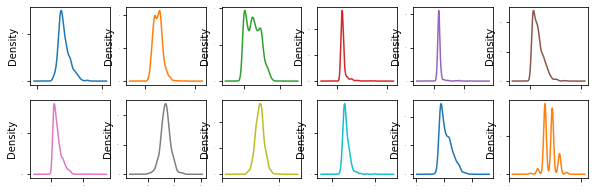

In [36]:
# Let's check skewness among all th columns.
wine_data.plot(kind='density', subplots=True, layout=(6,6),sharex=False,legend=False,fontsize=1,figsize=(10,10))
plt.show()

In [ ]:
# PREPROCESSING

In [38]:
# Let's Split the Independent and Target variables in x and y before removing the Skewness.

x=wine_data.drop('quality', axis=1)
y=wine_data['quality']

In [39]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [50]:
y= wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [51]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [42]:
# Checking skewness
x.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

In [45]:
from sklearn.preprocessing import power_transform

In [46]:
wine_x=power_transform(x)

In [47]:
wine_x

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568965e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
        -7.09517433e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054073e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
         7.18868617e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
         1.63859528e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831617e-01,  2.56369273e-01,  7.34557526e-01]])

In [48]:
pd.DataFrame(wine_x,columns=x.columns).skew().sort_values(ascending=False)

alcohol                 0.112372
citric acid             0.017788
sulphates               0.009985
volatile acidity        0.003099
fixed acidity           0.002529
pH                     -0.002823
total sulfur dioxide   -0.003752
density                -0.005054
free sulfur dioxide    -0.009948
residual sugar         -0.015715
chlorides              -0.151304
dtype: float64

<AxesSubplot:>

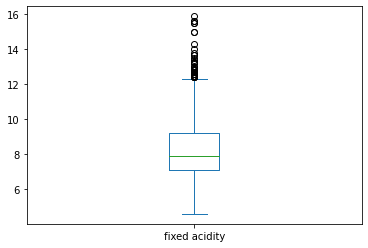

In [62]:
x['fixed acidity'].plot.box()

<AxesSubplot:>

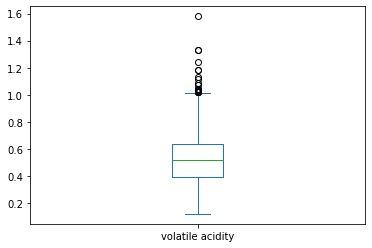

In [63]:
# Here in the above boxplot some data points are out of the whisker and very overlapped so from them some will be outliers & some not.  

x['volatile acidity'].plot.box()

<AxesSubplot:>

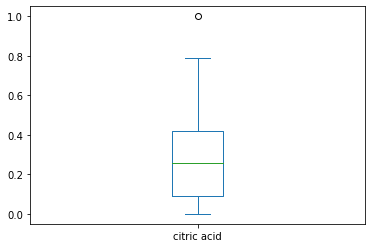

In [64]:
# Here in the above boxplot some data points are out of the whisker and some are to far that can be the outliers.

x['citric acid'].plot.box()

<AxesSubplot:>

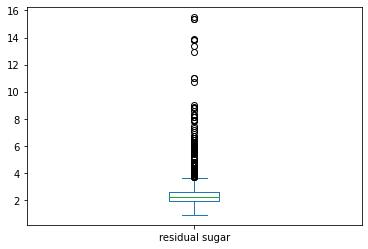

In [65]:
# Here in citric acid boxplot we can see one outlier.

x['residual sugar'].plot.box()

<AxesSubplot:>

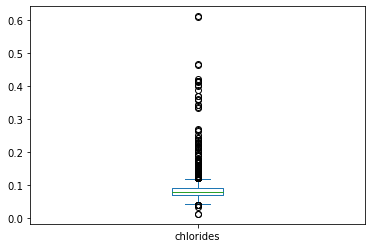

In [66]:
# Here some points are overlaped and touching the whishkers and the far ones are may be outliers.
x['chlorides'].plot.box()

<AxesSubplot:>

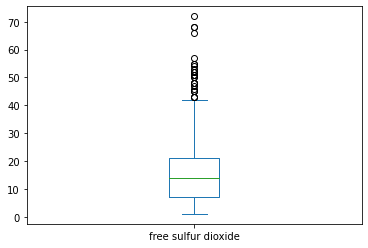

In [67]:
# Here points are lying on both whishkers and some are too far so they can be the outliers.

x['free sulfur dioxide'].plot.box()


<AxesSubplot:>

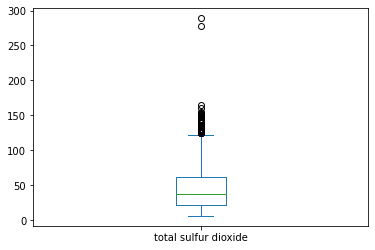

In [68]:
# Here some points are overlaped and touching the whishkers and the far ones are may be outliers.

x['total sulfur dioxide'].plot.box()


<AxesSubplot:>

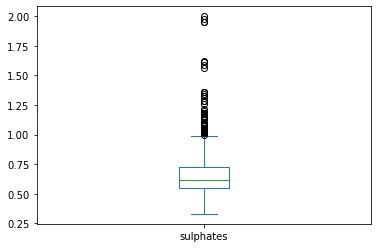

In [69]:
# Here only two data points are too far and they may be the outliers.

x['sulphates'].plot.box()


<AxesSubplot:>

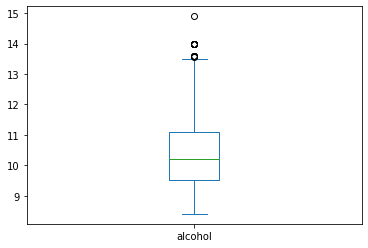

In [70]:
# Here is data points overlapping and some were too far so they are the outliers.

x['alcohol'].plot.box()


In [71]:
# Here we can see one point is far from the whishker so it is a outlier.

# Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [73]:
wine_df=x[(z<3).all(axis=1)]
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [74]:
wine_df.shape

(1458, 11)

In [75]:
x.shape

(1599, 11)

In [86]:
max_accuracy=0
max_RS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=i)
    rf= RandomForestClassifier()
    rf.fit(x_train,y_train)
    x_test_pred=rf.predict(x_test)
    accu=accuracy_score(y_test, x_test_pred)
    print('Accuracy is:',accu, 'random_state', i)
    
    if accu>max_accuracy:
        max_accuracy=accu
        maxRS=i
        print('maximum_accuracy',max_accuracy,'maximum_random_state',i)

Accuracy is: 0.915625 random_state 1
maximum_accuracy 0.915625 maximum_random_state 1
Accuracy is: 0.9125 random_state 2
Accuracy is: 0.934375 random_state 3
maximum_accuracy 0.934375 maximum_random_state 3
Accuracy is: 0.91875 random_state 4
Accuracy is: 0.9125 random_state 5
Accuracy is: 0.93125 random_state 6
Accuracy is: 0.896875 random_state 7
Accuracy is: 0.921875 random_state 8
Accuracy is: 0.925 random_state 9
Accuracy is: 0.896875 random_state 10
Accuracy is: 0.915625 random_state 11
Accuracy is: 0.89375 random_state 12
Accuracy is: 0.90625 random_state 13
Accuracy is: 0.9 random_state 14
Accuracy is: 0.921875 random_state 15
Accuracy is: 0.928125 random_state 16
Accuracy is: 0.925 random_state 17
Accuracy is: 0.90625 random_state 18
Accuracy is: 0.90625 random_state 19
Accuracy is: 0.90625 random_state 20
Accuracy is: 0.93125 random_state 21
Accuracy is: 0.921875 random_state 22
Accuracy is: 0.9 random_state 23
Accuracy is: 0.9 random_state 24
Accuracy is: 0.909375 random_sta

In [87]:
print('The Best Accuracy Score is:',max_accuracy,'on random_state',maxRS)

The Best Accuracy Score is: 0.953125 on random_state 50


In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [89]:
print(confusion_matrix(y_test,x_test_pred))
print(classification_report(y_test,x_test_pred))

[[277   7]
 [ 19  17]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       284
           1       0.71      0.47      0.57        36

    accuracy                           0.92       320
   macro avg       0.82      0.72      0.76       320
weighted avg       0.91      0.92      0.91       320

